In [ ]:
# Import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style='white')
# Set global figure size for all plots in the notebook
plt.rcParams["figure.figsize"] = (6, 4)

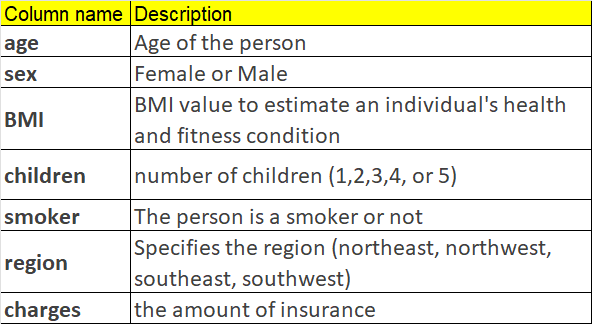

In [ ]:
# Set file path
path = r"C:\Users\TrinhQuynh\DA_Learning\Python\Projects\Course End Projects\CEP 2\insurance.csv"

In [ ]:
# Load the data file
df = pd.read_csv(path)

In [ ]:
# Show all rows
pd.set_option("display.max_rows", None)
df

### Identify strange values in the dataset

In [ ]:
# Check unique values
unique_val = df.apply(lambda x: x.unique())
unique_val

##### -> There is no strange values in object cols

In [ ]:
# Remove dupplicates if any

df.drop_duplicates(inplace=True)

### Discover Data

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.describe(include='object')

In [ ]:
df.describe(include='number')

### Check if there are any null values

In [ ]:
df.isnull().sum()

=> There is no null values

In [ ]:
df.columns

## Analysis

### 1. Charges columns

In [ ]:
df['charges'].describe()

In [ ]:
# Distribution of charges
sns.histplot(df['charges'], kde=True, color='r', stat='density', bins=20)

plt.title('Distribution of charges')
plt.show()
plt.close()

### 2. Explore the relationship between the feature and target column 

#### Evaluate age

In [ ]:
sns.histplot(data=df, x='age', color='b', kde=True)

In [ ]:
# Which age the the Charge is highest

df.loc[df['charges']==df['charges'].max(),'age']

In [ ]:
# Charges vs Age on Gender

sns.lmplot(data=df, x='age', y='charges', hue='sex')
plt.show()

=> There is no significant difference between genders in terms of who pays for insurace

In [ ]:
# Charges vs Age on Smoker

sns.lmplot(data=df, x='age', y='charges', hue='smoker')

plt.title('Charges vs Age on Smoker')
plt.show()

=> Again people who smoke souds having to pay more insurance charges

#### Evaluate BMI

In [ ]:
# Distribution of BMI

sns.histplot(data=df, x='bmi', color='b', kde=True)
plt.title('Distribution of BMI')

plt.show()
plt.close()

=> BMI data is perfectly normal distribution

In [ ]:
# Charges vs BMI

sns.regplot(data=df, x='bmi', y='charges')
plt.show()

In [ ]:
# Charges vs BMI on smoker

sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

In [ ]:
sns.displot(df[(df.bmi>=30)]['charges'])

In [ ]:
sns.displot(df[(df.bmi<30)]['charges'])

=> People who are obese tend to pay more 

#### Evalueate Region

In [ ]:
# Charges vs Region:

sns.boxplot(data=df, x='region', y='charges')

### 3. Perform data visualization using plots of feature vs feature

In [ ]:
# Target
Y = df['charges']
# Features
X = df.drop(columns = 'charges')
X.head()


In [ ]:
sns.countplot(data=df, x='sex')
plt.title('Gender Distribution')
plt.show()
plt.close()

=> The dataset is equally distributed between Gender

In [ ]:
sns.countplot(data=df, x='region')
plt.title('Region Distribution')
plt.show()
plt.close()

=> There are diffences in each region but not significant

In [ ]:
sns.countplot(data=df, x='smoker')
plt.title('Smoker Distribution')
plt.show()
plt.close()

=> Majority of the people in the dataset are not smoker

In [ ]:
# Check if people in their 18 

sns.catplot(data=df[(df.age==18)], x='smoker', kind='count', hue = 'sex')

In [ ]:
sns.barplot(x='sex', y='charges', hue='smoker', data=df[(df.age==18)])

=> Again people who smoke souds having to pay more insurance charges

In [ ]:
# Which region contain the highest charges

y=df.groupby('region')['charges'].mean().sort_values()
y

In [ ]:
sns.barplot(data=df, x='region', y='charges')

### 4. Machine Learning

Step 1: Feature Engineering

In [ ]:
# Transfrom catergorical features using Ordinal Encoder (Label incoder using for target)

from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df[['sex', 'region', 'smoker']]=enc.fit_transform(df[['sex', 'region', 'smoker']])

In [ ]:
df.head()

Step 2: Feature Selection

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
# Check which features are most related to charges
df.corr()['charges'].sort_values()

In [ ]:
# from sklearn.feature_selection import VarianceThreshold
# var_thres = VarianceThreshold(threshold=0.9)
# var_thres.fit(df)

In [ ]:
# var_thres.get_support()

In [ ]:
# Detemine Features (X) and Taget(Y)

X = df[['age', 'bmi',  'smoker']]
Y = df['charges']
X.head()

In [ ]:
# Import Train-test model

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.3, random_state=0)

In [ ]:
# Scale X

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_Xtrain = scaler.fit_transform(Xtrain)
scaled_Xtest = scaler.fit_transform(Xtest)

In [ ]:
# Define a function to get the model results easily

from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresult(prediction):
    print('Mean Absolute Error on the Model is:', mean_absolute_error(Ytest, prediction))
    print('Root Mean Square Error on the Model is:', np.sqrt(mean_absolute_error(Ytest, prediction)))

#### Build models

In [ ]:
# Liner Model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

    # Train the model
lr.fit(scaled_Xtrain, Ytrain)

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,scaled_Xtrain,Ytrain,cv=5)

In [ ]:
pred = lr.predict(scaled_Xtest)
modelresult(pred)